# Foundation for Analysis in the Health Data

This practice comes from https://pypi.org/project/PythonMeta/
By: Deng Hongyong. PyMeta, Python module of Meta-analysis

- Don't forget to pip install PythonMeta

## Lab 3: Meta analysis

- Evidence-based medicine (EBM) tasks, such as:
    Combining effect measures (OR, RR, RD for count data and MD, SMD for continuous data);
    Heterogeneity test(Q/Chi-square test);
    Subgroup analysis;
    Plots drawing: forest plot, funnel plot, etc.

- Meta analysis is one of the 'Evidence-based medicine (EBM) tasks' for clinician.

In [2]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import PythonMeta as PMA

Study ID   Experiment Group     Control Group        
           e1         n1         e2         n2         
Fang2015   15         40         24         37         
Gong2012   10         40         18         35         
Liu2015    30         50         40         50         
Long2012   19         40         26         40         
Wang2003   7          86         15         86         
Chen2008   20         60         28         60         
Guo2014    31         51         41         51         
Li2015     29         61         31         60         
Yang2006   21         40         31         40         
Zhao2012   27         40         30         40         

Fixed MH RR
Study ID   n       ES[95% CI]         Weight(%)
Fang2015   77      0.58[0.36 0.92]     8.71
Gong2012   75      0.49[0.26 0.91]     6.70
Liu2015    100     0.75[0.58 0.98]    13.97
Long2012   80      0.73[0.49 1.09]     9.08
Wang2003   172     0.47[0.20 1.09]     5.24
Chen2008   120     0.71[0.46 1.12]     9.78
Guo20

C:\Users\LAB207\anaconda3\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\LAB207\anaconda3\lib\site-packages\ipykernel_launcher.py:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\LAB207\anaconda3\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\LAB207\anaconda3\lib\site-packages\ipykernel_launcher.py:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Study ID   Experiment Group               Control Group                  
           m1         sd1        n1         m2         sd2        n2         
Atmaca2005 20.9       6.0        15.0       27.4        8.5        14.0       
Guo2014    12.8       5.2        51.0       11.9        5.3        51.0       
Liu2010    23.38      5.86       35.0       24.32       5.43       35.0       
Wang2012   15.67      8.78       43.0       18.67       9.87       43.0       
Xu2002     15.49      7.16       50.0       21.72       8.07       50.0       
Zhao2012   12.8       5.7        40.0       13.0        5.2        40.0       

Fixed IV MD
Study ID   n       ES[95% CI]         Weight(%)
Atmaca2005 29      -6.50[-11.89 -1.11]     4.48
Guo2014    102     0.90[-1.14 2.94]    31.32
Liu2010    70      -0.94[-3.59 1.71]    18.57
Wang2012   86      -3.00[-6.95 0.95]     8.34
Xu2002     100     -6.23[-9.22 -3.24]    14.54
Zhao2012   80      -0.20[-2.59 2.19]    22.75
MD         467     -1.39[-2.53 -0.2

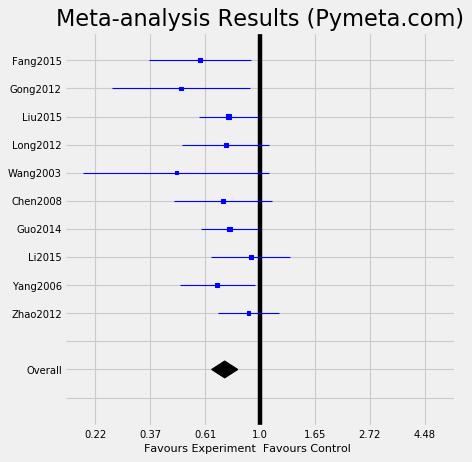

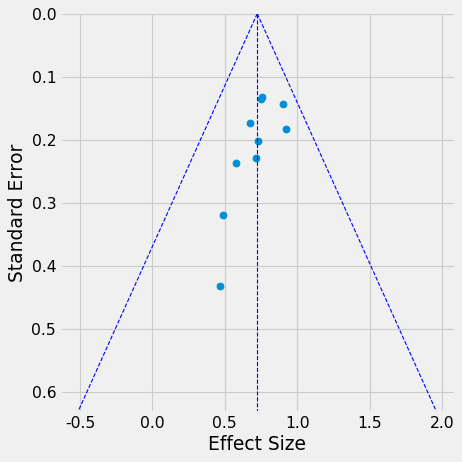

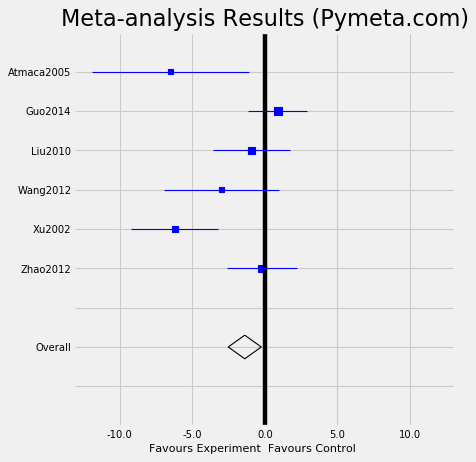

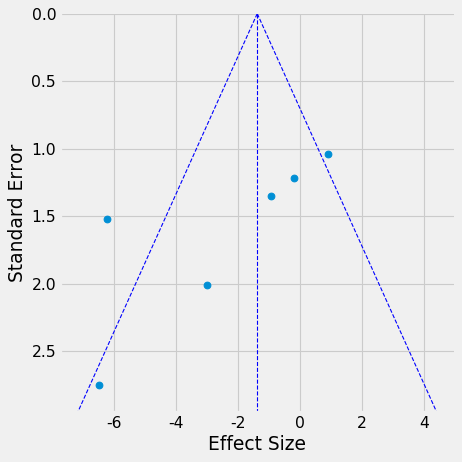

In [3]:
#import PythonMeta as PMA

def showstudies(studies,dtype):    
    #show continuous data
    if dtype.upper()=="CONT":
        text = "%-10s %-30s %-30s \n"%("Study ID","Experiment Group","Control Group")
        text += "%-10s %-10s %-10s %-10s %-10s %-10s %-10s \n"%(" ","m1","sd1","n1","m2","sd2","n2")
        for i in range(len(studies)):
            text += "%-10s %-10s %-10s %-10s %-10s  %-10s %-10s \n"%(
            studies[i][6],        #study ID
            str(studies[i][0]),   #mean of group1
            str(studies[i][1]),   #SD of group1
            str(studies[i][2]),   #total num of group1
            str(studies[i][3]),   #mean of group2
            str(studies[i][4]),   #SD of group2
            str(studies[i][5])    #total num of group2
            )
        return text

    #show dichotomous data
    text = "%-10s %-20s %-20s \n"%("Study ID","Experiment Group","Control Group")
    text += "%-10s %-10s %-10s %-10s %-10s \n"%(" ","e1","n1","e2","n2")
    for i in range(len(studies)):
        text += "%-10s %-10s %-10s %-10s %-10s \n"%(
        studies[i][4],        #study ID
        str(studies[i][0]),   #event num of group1
        str(studies[i][1]),   #total num of group1
        str(studies[i][2]),   #event num of group2
        str(studies[i][3])    #total num of group2
        )
    return text

def showresults(rults):
    text = "%-10s %-6s  %-18s %-10s"%("Study ID","n","ES[95% CI]","Weight(%)\n")    
    for i in range(1,len(rults)):
        text += "%-10s %-6d  %-4.2f[%.2f %.2f]   %6.2f\n"%(   # for each study
        rults[i][0],     #study ID
        rults[i][5],     #total num
        rults[i][1],     #effect size
        rults[i][3],     #lower of CI
        rults[i][4],     #higher of CI
        100*(rults[i][2]/rults[0][2])  #weight
        )
    text += "%-10s %-6d  %-4.2f[%.2f %.2f]   %6d\n"%(         # for total effect
        rults[0][0],     #total effect size name
        rults[0][5],     #total N (all studies)
        rults[0][1],     #total effect size
        rults[0][3],     #total lower CI
        rults[0][4],     #total higher CI
        100
        )  
    text += "%d studies included (N=%d)\n"%(len(rults)-1,rults[0][5])
    text += "Heterogeneity: Tau\u00b2=%.3f "%(rults[0][12]) if not rults[0][12]==None else "Heterogeneity: "
    text += "Q(Chisquare)=%.2f(p=%s); I\u00b2=%s\n"%(
        rults[0][7],     #Q test value
        rults[0][8],     #p value for Q test
        str(round(rults[0][9],2))+"%")   #I-square value
    text += "Overall effect test: z=%.2f, p=%s\n"%(rults[0][10],rults[0][11])  #z-test value and p-value

    return text

def main(stys,settings):
    d = PMA.Data()  #Load Data class
    m = PMA.Meta()  #Load Meta class
    f = PMA.Fig()   #Load Fig class

    #You should always tell the datatype first!!!
    d.datatype = settings["datatype"]                #set data type, 'CATE' for binary data or 'CONT' for continuous data
    studies = d.getdata(stys)                        #load data
    #studies = d.getdata(d.readfile("studies.txt"))  #get data from a data file, see examples of data files
    print(showstudies(studies,d.datatype))           #show studies

    m.datatype=d.datatype                            #set data type for meta-analysis calculating
    m.models = settings["models"]                    #set effect models: 'Fixed' or 'Random'
    m.algorithm = settings["algorithm"]              #set algorithm, based on datatype and effect size
    m.effect = settings["effect"]                    #set effect size:RR/OR/RD for binary data; SMD/MD for continuous data
    results = m.meta(studies)                        #performing the analysis
    print(m.models + " " + m.algorithm + " " + m.effect)
    print (showresults(results))                     #show results table
    f.forest(results).show()                         #show forest plot
    f.funnel(results).show()                         #show funnel plot

if __name__ == '__main__':
    samp_cate=[  #this array can be stored into a data file by lines, and loaded with d.readfile("filename")
    "Fang 2015,15,40,24,37",
    "Gong 2012,10,40,18,35",
    "Liu 2015,30,50,40,50",
    "Long 2012,19,40,26,40",
    "Wang 2003,7,86,15,86",
    "<subgroup>name=short term",
    "Chen 2008,20,60,28,60",
    "Guo 2014,31,51,41,51",
    "Li 2015,29,61,31,60",
    "Yang 2006,21,40,31,40",
    "Zhao 2012,27,40,30,40",
    "<subgroup>name=medium term",
    "#<nototal>",
    " ",
    "#This is a sample of binary data with subgroup.",
    "#Syntax: study name, e1, n1, e2, n2",
    "#e1,n1: events and number of experiment group;",
    "#e2,n2: events and number of control group.",
    "#And you can add a line of <nototal> to hide the Overall result."]

    samp_cont=[  #this array can be stored into a data file by lines, and loaded with d.readfile("filename")
    "Atmaca 2005, 20.9,  6.0,  15,  27.4,  8.5,  14",
    "Guo 2014,    12.8,  5.2,  51,  11.9,  5.3,  51",
    "Liu 2010,    23.38, 5.86, 35,  24.32, 5.43, 35",
    "Wang 2012,   15.67, 8.78, 43,  18.67, 9.87, 43",
    "Xu 2002,     15.49, 7.16, 50,  21.72, 8.07, 50",
    "Zhao 2012,   12.8,  5.7,  40,  13.0,  5.2,  40",
    " ",
    "#This is a sample of continuous data.",
    "#Input one study in a line;",
    "#Syntax: study name, m1, sd1, n1, m2, sd2, n2",
    "#m1, sd1, n1: mean, SD and number of experiment group;",
    "#m2, sd2, n2: mean, SD and number of control group."]

    #sample 1: dichotomous data
    settings={"datatype":"CATE",  #for CATEgorical/count/binary/dichotomous data
    "models":"Fixed",             #models: Fixed or Random
    "algorithm":"MH",             #algorithm: MH, Peto or IV
    "effect":"RR"}                #effect size: RR, OR, RD
    main(samp_cate,settings)

    #sample 2: continuous data
    settings={"datatype":"CONT",  #for CONTinuous data
    "models":"Fixed",             #models: Fixed or Random
    "algorithm":"IV",             #algorithm: IV
    "effect":"MD"}                #effect size: MD, SMD
    main(samp_cont,settings)

## แปลจ้า

experiment กับ control ไม่เท่าเพราะดรอปคนไข้ไป

ค่า I²= 0% แปลว่ายังบอกอะไรไม่ได้

กราฟ 1 มีค่าไปทางซ้ายเยอะ น่าจะใช้แทนประชากรได้

กราฟ 2 ค่าอยู่ในกรวยพอจะใช้แทนประชากรได้ แปลว่าสอดคล้องกัน ถ้าอยู่นอกกรวยจะไม่สอดคล้อง

กราฟ3 มีค่าไปทางขวา แปลว่ายังมีค่า Heterogeneity ถ้าจะใช้แทนประชากรต้องคิดใหม่

กราฟ4 มีค่านอกกรวย ใช้ไม่ได้

## Practice Lab

In the above cell, two sets of data (category data set and continuous data set) are shown in the same cell with the nessessary user's defined functions as in def showstudies, def showresults and def main . 

Your task is to create a new notebook file that do meta analysis in step by step as:
1. read the data stored in .csv format
2. use all defined function to show the data table, calculate meta analysis and show the result from fixed effect model, algorithm: MH or IV
3. show the forest plot and funnel plot

Your example file is provided as *DM_perio 4.csv*.

dm = เบาหวาน

perio = เหงือก

Treated_diff_HbA1C = น้ำตาลในเลือด

Controls_diff_HbA1C = ควบคุมน้ำตาลในเลือด

In [5]:
dm_perio = Table.read_table('DM_perio 4.csv')
dm_perio

Unnamed: 0,Year,Adjunc (local),Treated_N,Treated_diff_HbA1C_mean,Treated_diff_HbA1C_SD,Controls_N,Controls_diff_HbA1C_mean,Controls_diff_HbA1C_SD
Kiran et al.,2005,0,22,-0.8,0.77,22,0.31,1.83
Mansouri et al.,2006,0,15,-0.5,0.69,14,-0.3,0.92
Stewart et al.,2001,1,36,-1.9,0.3,36,-0.8,0.6
Katagiri et al.,2009,1,32,-0.14,0.63,17,-0.09,0.57
Koromantzos et al.,2011,1,30,-0.73,0.66,30,-0.18,0.59
Chen et al.(A),2012,1,42,-0.01,1.94,41,0.34,2.14
Chen et al.(B),2012,0,41,0.14,2.18,41,0.34,2.14
Moeintaghavi et al.,2012,1,22,-0.74,1.67,18,0.25,2.87
Chen et al.(A),2011,0,85,-0.07,1.46,41,0.34,1.52
Chen et al.(B),2011,1,85,-0.32,1.33,41,0.13,1.53


Study ID   Experiment Group               Control Group                  
           m1         sd1        n1         m2         sd2        n2         
Kiranetal.2005 -0.8       0.77       22.0       0.31        1.83       22.0       
Mansourietal.2006 -0.5       0.69       15.0       -0.3        0.92       14.0       
Stewartetal.2001 -1.9       0.3        36.0       -0.8        0.6        36.0       
Katagirietal.2009 -0.14      0.63       32.0       -0.09       0.57       17.0       
Koromantzosetal.2011 -0.73      0.66       30.0       -0.18       0.59       30.0       
Chenetal.(A)2012 -0.01      1.94       42.0       0.34        2.14       41.0       

Fixed IV MD
Study ID   n       ES[95% CI]         Weight(%)
Kiranetal.2005 44      -1.11[-1.94 -0.28]     3.26
Mansourietal.2006 29      -0.20[-0.80 0.40]     6.33
Stewartetal.2001 72      -1.10[-1.32 -0.88]    46.67
Katagirietal.2009 49      -0.05[-0.40 0.30]    18.51
Koromantzosetal.2011 60      -0.55[-0.87 -0.23]    22.33
Chenet

C:\Users\LAB207\anaconda3\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\LAB207\anaconda3\lib\site-packages\ipykernel_launcher.py:81: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


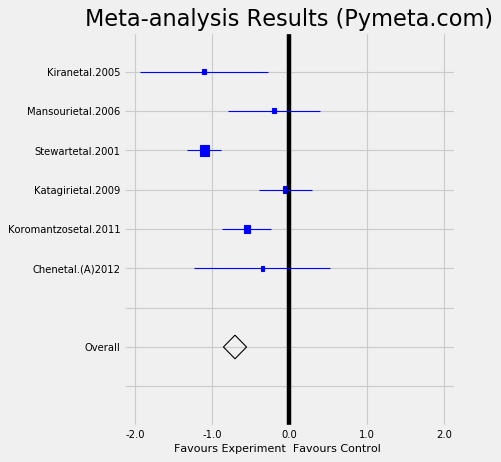

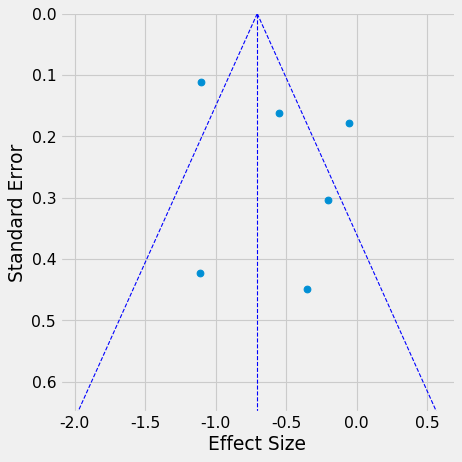

In [9]:
#import PythonMeta as PMA

def showstudies(studies,dtype):    
    #show continuous data
    if dtype.upper()=="CONT":
        text = "%-10s %-30s %-30s \n"%("Study ID","Experiment Group","Control Group")
        text += "%-10s %-10s %-10s %-10s %-10s %-10s %-10s \n"%(" ","m1","sd1","n1","m2","sd2","n2")
        for i in range(len(studies)):
            text += "%-10s %-10s %-10s %-10s %-10s  %-10s %-10s \n"%(
            studies[i][6],        #study ID
            str(studies[i][0]),   #mean of group1
            str(studies[i][1]),   #SD of group1
            str(studies[i][2]),   #total num of group1
            str(studies[i][3]),   #mean of group2
            str(studies[i][4]),   #SD of group2
            str(studies[i][5])    #total num of group2
            )
        return text

    #show dichotomous data
    text = "%-10s %-20s %-20s \n"%("Study ID","Experiment Group","Control Group")
    text += "%-10s %-10s %-10s %-10s %-10s \n"%(" ","e1","n1","e2","n2")
    for i in range(len(studies)):
        text += "%-10s %-10s %-10s %-10s %-10s \n"%(
        studies[i][4],        #study ID
        str(studies[i][0]),   #event num of group1
        str(studies[i][1]),   #total num of group1
        str(studies[i][2]),   #event num of group2
        str(studies[i][3])    #total num of group2
        )
    return text

def showresults(rults):
    text = "%-10s %-6s  %-18s %-10s"%("Study ID","n","ES[95% CI]","Weight(%)\n")    
    for i in range(1,len(rults)):
        text += "%-10s %-6d  %-4.2f[%.2f %.2f]   %6.2f\n"%(   # for each study
        rults[i][0],     #study ID
        rults[i][5],     #total num
        rults[i][1],     #effect size
        rults[i][3],     #lower of CI
        rults[i][4],     #higher of CI
        100*(rults[i][2]/rults[0][2])  #weight
        )
    text += "%-10s %-6d  %-4.2f[%.2f %.2f]   %6d\n"%(         # for total effect
        rults[0][0],     #total effect size name
        rults[0][5],     #total N (all studies)
        rults[0][1],     #total effect size
        rults[0][3],     #total lower CI
        rults[0][4],     #total higher CI
        100
        )  
    text += "%d studies included (N=%d)\n"%(len(rults)-1,rults[0][5])
    text += "Heterogeneity: Tau\u00b2=%.3f "%(rults[0][12]) if not rults[0][12]==None else "Heterogeneity: "
    text += "Q(Chisquare)=%.2f(p=%s); I\u00b2=%s\n"%(
        rults[0][7],     #Q test value
        rults[0][8],     #p value for Q test
        str(round(rults[0][9],2))+"%")   #I-square value
    text += "Overall effect test: z=%.2f, p=%s\n"%(rults[0][10],rults[0][11])  #z-test value and p-value

    return text

def main(stys,settings):
    d = PMA.Data()  #Load Data class
    m = PMA.Meta()  #Load Meta class
    f = PMA.Fig()   #Load Fig class

    #You should always tell the datatype first!!!
    d.datatype = settings["datatype"]                #set data type, 'CATE' for binary data or 'CONT' for continuous data
    studies = d.getdata(stys)                        #load data
    #studies = d.getdata(d.readfile("studies.txt"))  #get data from a data file, see examples of data files
    print(showstudies(studies,d.datatype))           #show studies

    m.datatype=d.datatype                            #set data type for meta-analysis calculating
    m.models = settings["models"]                    #set effect models: 'Fixed' or 'Random'
    m.algorithm = settings["algorithm"]              #set algorithm, based on datatype and effect size
    m.effect = settings["effect"]                    #set effect size:RR/OR/RD for binary data; SMD/MD for continuous data
    results = m.meta(studies)                        #performing the analysis
    print(m.models + " " + m.algorithm + " " + m.effect)
    print (showresults(results))                     #show results table
    f.forest(results).show()                         #show forest plot
    f.funnel(results).show()                         #show funnel plot

if __name__ == '__main__':
    samp_cont=[  #this array can be stored into a data file by lines, and loaded with d.readfile("filename")
    "Kiran et al. 2005,-0.8,0.77,22,0.31,1.83,22",
    "Mansouri et al. 2006,-0.5,0.69,15,-0.3,0.92,14",
"Stewart et al. 2001,-1.9,0.3,36,-0.8,0.6,36",
"Katagiri et al. 2009,-0.14,0.63,32,-0.09,0.57,17",
"Koromantzos et al. 2011,-0.73,0.66,30,-0.18,0.59,30",
"Chen et al.(A) 2012,-0.01,1.94,42,0.34,2.14,41",
    " ",
    "#This is a sample of continuous data.",
    "#Input one study in a line;",
    "#Syntax: study name, m1, sd1, n1, m2, sd2, n2",
    "#m1, sd1, n1: mean, SD and number of experiment group;",
    "#m2, sd2, n2: mean, SD and number of control group."]

    #sample 2: continuous data
    settings={"datatype":"CONT",  #for CONTinuous data
    "models":"Fixed",             #models: Fixed or Random
    "algorithm":"IV",             #algorithm: IV
    "effect":"MD"}                #effect size: MD, SMD
    main(samp_cont,settings)